In [43]:
import numpy as np
import matplotlib.pyplot as plt
from data.dataset import data

import copy
import math
%matplotlib inline

**Problem Statement**
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

You would like to expand your business to cities that may give your restaurant higher profits.
The chain already has restaurants in various cities and you have data for profits and populations from the cities.
You also have data on cities that are candidates for a new restaurant.
For these cities, you have the city population.
Can you use the data to help you identify which cities may potentially give your business higher profits?


You will start by loading the dataset for this task.

The load_data() function shown below loads the data into variables x_train and y_train
x_train is the population of a city
y_train is the profit of a restaurant in that city. A negative value for profit indicates a loss.
Both X_train and y_train are numpy arrays.

In [44]:
def load_data():
     # Ensure it uses the data you defined above
    X = data[:, 0]
    y = data[:, 1]
    return X, y

def load_data_multi():
    # Placeholder: Use actual multi-variable data here when available
    X = data[:, :2]
    y = data[:, 2] if data.shape[1] > 2 else None  # Adjust as necessary
    return X, y


In [45]:
x_train,y_train = load_data()

In [48]:
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


x_train is a numpy array that contains decimal values that are all greater than zero.

These values represent the city population times 10,000
For example, 6.1101 means that the population for that city is 61,101
Now, let's print y_train

In [49]:
print("Type of y_train: ",type(y_train))
print("First 5 elements of y_train are\n", y_train[:5])

Type of y_train:  <class 'numpy.ndarray'>
First 5 elements of y_train are
 [17.592   9.1302 13.662  11.854   6.8233]


Similarly, y_train is a numpy array that has decimal values, some negative, some positive.

These represent your restaurant's average monthly profits in each city, in units of $10,000.
For example, 17.592 represents $175,920 in average monthly profits for that city.
-2.6807 represents -$26,807 in average monthly loss for that city.

Check the dimensions of your variables
Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of x_train and y_train and see how many training examples you have in your dataset.

In [50]:
print("Shape of x_train is" ,np.shape(x_train))
print("Shape of y_train is" ,y_train.shape)
print("Number of training examples(m): ",len(x_train))

Shape of x_train is (97,)
Shape of y_train is (97,)
Number of training examples(m):  97


Visualize your data
It is often useful to understand the data by visualizing it.

For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).
Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales).When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.

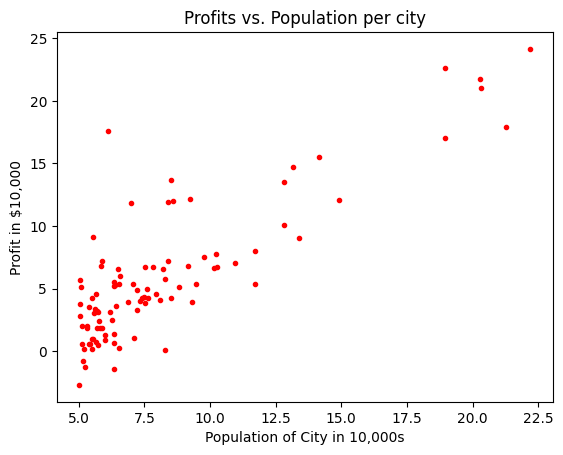

In [51]:
plt.scatter(x_train, y_train, marker ='.', c = 'r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

Your goal is to build a linear regression model to fit this data.

With this model, you can then input a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.


<br><br>
**Refresher on linear regression**
<br>In this practice lab, you will fit the linear regression parameters  (𝑤,𝑏)
  to your dataset.

* The model function for linear regression, which is a function that maps from x (city population) to y (your restaurant's monthly profit for that city) is represented as
    𝑓𝑤,𝑏(𝑥)=𝑤𝑥+𝑏
 
* To train a linear regression model, you want to find the best  (𝑤,𝑏)
  parameters that fit your dataset.

* To compare how one choice of  (𝑤,𝑏)
  is better or worse than another choice, you can evaluate it with a cost function  𝐽(𝑤,𝑏)
 

* 𝐽 is a function of  (𝑤,𝑏) That is, the value of the cost  𝐽(𝑤,𝑏) depends on the value of  (𝑤,𝑏).
* The choice of  (𝑤,𝑏)
  that fits your data the best is the one that has the smallest cost  𝐽(𝑤,𝑏).

* To find the values  (𝑤,𝑏) that gets the smallest possible cost  𝐽(𝑤,𝑏) , you can use a method called gradient descent.
* With each step of gradient descent, your parameters  (𝑤,𝑏) come closer to the optimal values that will achieve the lowest cost  𝐽(𝑤,𝑏).
* The trained linear regression model can then take the input feature  𝑥(city population) and output a prediction  𝑓𝑤,𝑏(𝑥)(predicted monthly profit for a restaurant in that city).

**Compute Cost**<br><br>
Gradient descent involves repeated steps to adjust the value of your parameter  (𝑤,𝑏)
  to gradually get a smaller and smaller cost  𝐽(𝑤,𝑏) .

At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost  𝐽(𝑤,𝑏)
  as  (𝑤,𝑏)
  gets updated.
In this section, you will implement a function to calculate  𝐽(𝑤,𝑏)
  so that you can check the progress of your gradient descent implementation.
Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression  𝐽(𝑤,𝑏)
  is defined as

𝐽(𝑤,𝑏)=12𝑚∑𝑖=0𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))2
 

You can think of  𝑓𝑤,𝑏(𝑥(𝑖))
  as the model's prediction of your restaurant's profit, as opposed to  𝑦(𝑖)
 , which is the actual profit that is recorded in the data.
𝑚
  is the number of training examples in the dataset
Model prediction
For linear regression with one variable, the prediction of the model  𝑓𝑤,𝑏
  for an example  𝑥(𝑖)
  is representented as:
𝑓𝑤,𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏
 

This is the equation for a line, with an intercept  𝑏
  and a slope  𝑤

In [59]:
def compute_cost(x,y,w,b):
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
               
    """
    # number of training examples
    m= x.shape[0]
    total_cost = 0
    fwb = w*x + b
    total_cost = np.sum((fwb - y)**2)/(2*m)

    return total_cost

You can check if your implementation was correct by running the following test code:

In [60]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)

print(type(cost))
print(f'Cost at initial w: {cost:.3f}')



<class 'numpy.float64'>
Cost at initial w: 75.203


**Gradient descent**<br>
In this section, you will implement the gradient for parameters  𝑤,𝑏 for linear regression.

the gradient descent algorithm is:

repeat until convergence:
    {
    𝑏:=𝑏− 𝛼∂𝐽(𝑤,𝑏)∂𝑏
    𝑤:=𝑤−𝛼∂𝐽(𝑤,𝑏)∂𝑤
    }

where, parameters  𝑤,𝑏 are both updated simultaniously and where
    ∂𝐽(𝑤,𝑏)∂𝑏= 1𝑚∑𝑖=0𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))
    
    ∂𝐽(𝑤,𝑏)∂𝑤=1𝑚∑𝑖=0𝑚−1(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)

m is the number of training examples in the dataset
𝑓𝑤,𝑏(𝑥(𝑖)) is the model's prediction, while 
𝑦(𝑖) is the target value
You will implement a function called compute_gradient which calculates  ∂𝐽(𝑤)∂𝑤, ∂𝐽(𝑤)∂𝑏
 



Please complete the compute_gradient function to:

Iterate over the training examples, and for each example, compute:

The prediction of the model for that example
𝑓𝑤𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏

The gradient for the parameters 𝑤,𝑏
 from that example
∂𝐽(𝑤,𝑏)∂𝑏(𝑖)=(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))
∂𝐽(𝑤,𝑏)∂𝑤(𝑖)=(𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))𝑥(𝑖)

Return the total gradient update from all the examples
∂𝐽(𝑤,𝑏)∂𝑏=1𝑚∑𝑖=0𝑚−1∂𝐽(𝑤,𝑏)∂𝑏(𝑖)

∂𝐽(𝑤,𝑏)∂𝑤=1𝑚∑𝑖=0𝑚−1∂𝐽(𝑤,𝑏)∂𝑤(𝑖)

Here, 𝑚
 is the number of training examples and ∑
 is the summation operator

In [85]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
   
        
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ###
    predictions = w * x + b
    
    # Errors (predictions - actual values)
    errors = predictions - y
    
   
        
    dj_dw = np.sum(errors * x) / m
    dj_db = np.sum(errors) / m
    ### END CODE HERE ### 
    
        
    return dj_dw, dj_db

In [86]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546393


In [90]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392


In [93]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha.
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  # avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using w, b, alpha, and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion 
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
    
    return w, b, J_history, w_history  # return w and J,w history for graphing


Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [94]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74
Iteration  150: Cost     5.31
Iteration  300: Cost     4.96
Iteration  450: Cost     4.76
Iteration  600: Cost     4.64
Iteration  750: Cost     4.57
Iteration  900: Cost     4.53
Iteration 1050: Cost     4.51
Iteration 1200: Cost     4.50
Iteration 1350: Cost     4.49
w,b found by gradient descent: 1.166362350335582 -3.6302914394043597


We will now use the final parameters from gradient descent to plot the linear fit.

Recall that we can get the prediction for a single example  𝑓(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏
 .

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [95]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

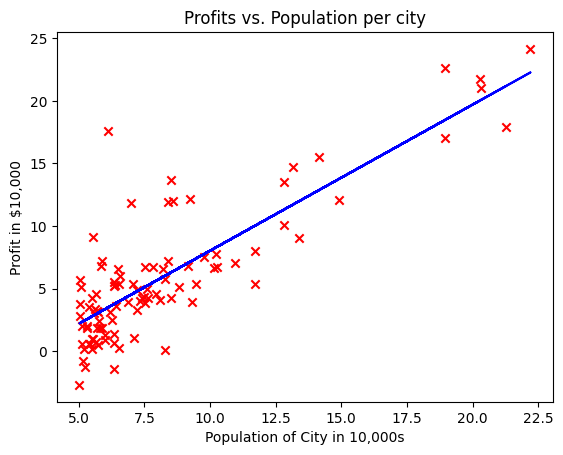

In [96]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

Your final values of  𝑤,𝑏
  can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people.

The model takes in population of a city in 10,000s as input.

Therefore, 35,000 people can be translated into an input to the model as np.array([3.5])

Similarly, 70,000 people can be translated into an input to the model as np.array([7.])

In [99]:
predict1 = w* 3.5 + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = w* 7 + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
